# Dimensionality Reduction Exercise

In this exercise, you will be asked to build several Machine Learning models, while understanding the value of PCA dimensionality reduction. Make sure your code is readable, functional, documented and that you give elaborate explanations and some plots to go with your code.

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA



import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings('ignore')


## 1. Load the MNIST dataset attached to this exercise (it is already divided to train and test sets, load both)

In [2]:
#Load the MNIST dataset
train = pd.read_csv('./mnist-in-csv/mnist_test.csv')
test = pd.read_csv('./mnist-in-csv/mnist_test.csv')

X_train = train.drop('label', axis = 1)
y_train = train['label']
X_test = test.drop('label', axis = 1)
y_test = test['label']

## 2. Build a classifier of your choice on the given data (your features are the pixels), and evaluate it. Elaborate on the performance of your model.

Here we will use the Random forest algorithm.
It provides higher accuracy.
Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data.
If there are more trees, it won’t allow overfitting trees in the model.
It has the power to handle a large data set with higher dimensionality

In [3]:
#scaling the data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

#fit the random forest classifier
clf_forest = RandomForestClassifier(n_estimators=4,random_state=5)
clf_forest.fit(X_train_s, y_train)
y_pred_forest = clf_forest.predict(X_test_s)

#Elaborate on the performance of our model
accuracy = accuracy_score(y_test, y_pred_forest)
f1 = f1_score(y_test, y_pred_forest, average='macro')

print(f'accuracy: {accuracy}\nf1-score: {f1}')

accuracy: 0.9816
f1-score: 0.9813675011594695


We have a good score and high accuracy with this model

## 3. Perform a PCA dimensionality reduction on the data, and re-train the same model on the new top k features. Evaluate the new model and elaborate on the performance of your model. 
The value of k is for you to choose, explain why you chose that number.

Now we will celect the value k. It will be point with maximum accuracy and f-1 value 

In [4]:
acc_list = []
f1_list = []

for k in range(10, 201, 10):
    #Perform a PCA dimensionality reduction on the data
    pca = PCA(n_components=k, random_state=5).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    #re-train the same model on the new top k features
    clf_forest.fit(X_train_pca, y_train)
    y_pred_pca = clf_forest.predict(X_test_pca)
       
    #Evaluate the new model and elaborate on the performance of your model.
    acc_pca = accuracy_score(y_test, y_pred_pca)
    f1_pca = f1_score(y_test, y_pred_pca, average='macro')

    acc_list.append(acc_pca)
    f1_list.append(f1_pca)   

Let's  plot our  models parameters and chose the optimal k

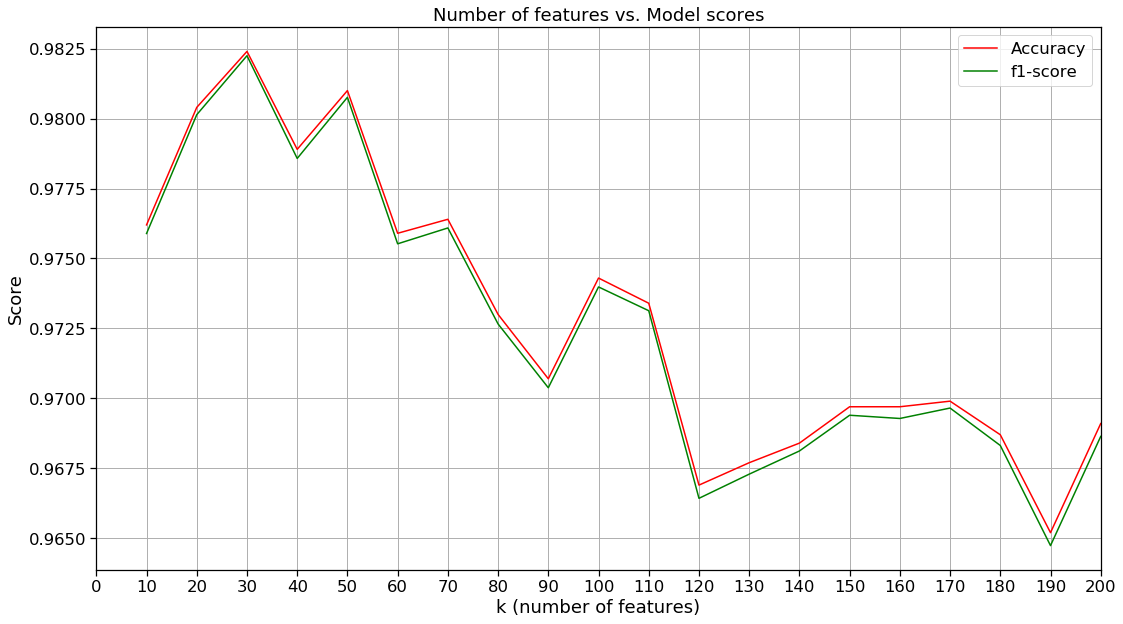

In [5]:
plt.figure(figsize = (18,10))
plt.plot(range(10, 201, 10), acc_list,color='r', label = 'Accuracy')
plt.plot(range(10, 201, 10), f1_list, color='g',label = 'f1-score')
plt.xlabel('k (number of features)')
plt.ylabel('Score')
plt.legend()
plt.xlim(5,100)
plt.grid()
plt.xticks(np.arange(0, 210, step=10))
plt.title('Number of features vs. Model scores');

best_k=(np.argmax(f1_list)+1)*10

In [6]:
print(f'The best number of components is {best_k}')
print(f'Accuracy for {best_k} components is {np.max(acc_list)}')
print(f'F-1 scpore for {best_k} components is {np.max(f1_list)}')

The best number of components is 30
Accuracy for 30 components is 0.9824
F-1 scpore for 30 components is 0.9822461255600705


The best number of components in our case is 30. We can see it very clear on the plot. Accuracy decreased since the point 30 

## 4. Compare the model that you got from question 3, to a model using random k (same k as in question 3) pixels as features. Elaborate on your findings.

let's try to build a model using random k (same k as in question 3) pixels as features

In [7]:
#sampling  random with best k from Q3
indx = X_train.columns.to_series().sample(n=best_k, random_state=5).to_list()
X_train_r = X_train[indx]
X_test_r = X_test[indx]

#scaling the random data
X_train_r = scaler.fit_transform(X_train_r)
X_test_r = scaler.transform(X_test_r)

#fit the random forest classifier
clf_forest = RandomForestClassifier(n_estimators=4,random_state=5)
clf_forest.fit(X_train_r, y_train)
y_pred_forest_r = clf_forest.predict(X_test_r)

#Elaborate on the performance of our model
accuracy_r = accuracy_score(y_test, y_pred_forest_r)
f1_r = f1_score(y_test, y_pred_forest_r, average='macro')

print(f'accuracy_rand: {accuracy_r}\nf1-score_rand: {f1_r}')

accuracy_rand: 0.9421
f1-score_rand: 0.9412903307056466


We got not so good result as it was first time and in Q3, but our model is still good

In [8]:
#model from the Q3 vs model using random k 
acc_list = []
f1_list = []

acc_list_r = []
f1_list_r = []

for k in range(10, 201, best_k):
    #Perform a PCA dimensionality reduction on the data
    pca = PCA(n_components=k, random_state=5).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    #re-train the same model on the new top k features
    clf_forest.fit(X_train_pca, y_train)
    y_pred_pca = clf_forest.predict(X_test_pca)
       
    #Evaluate the new model and elaborate on the performance of your model.
    acc_pca = accuracy_score(y_test, y_pred_pca)
    f1_pca = f1_score(y_test, y_pred_pca, average='macro')

    acc_list.append(acc_pca)
    f1_list.append(f1_pca)   
    
    #____________________________________________________________________
    #sampling  random
    indx = X_train.columns.to_series().sample(n=k, random_state=5).to_list()
    X_train_r = X_train[indx]
    X_test_r = X_test[indx]
    
    #scaling the random data
    X_train_r = scaler.fit_transform(X_train_r)
    X_test_r = scaler.transform(X_test_r)

    #fit the random forest classifier
    clf_forest = RandomForestClassifier(n_estimators=4,random_state=2)
    clf_forest.fit(X_train_r, y_train)
    y_pred_forest_r = clf_forest.predict(X_test_r)

    #Elaborate on the performance of our model
    accuracy_r = accuracy_score(y_test, y_pred_forest_r)
    f1_r = f1_score(y_test, y_pred_forest_r, average='macro')

    acc_list_r.append(accuracy_r)
    f1_list_r.append(f1_r)   
    

Let's plot Number of features vs. Model scores

The best number of components for PCA is 40 with step 30
The best number for random  components sampling is 190  with step 30


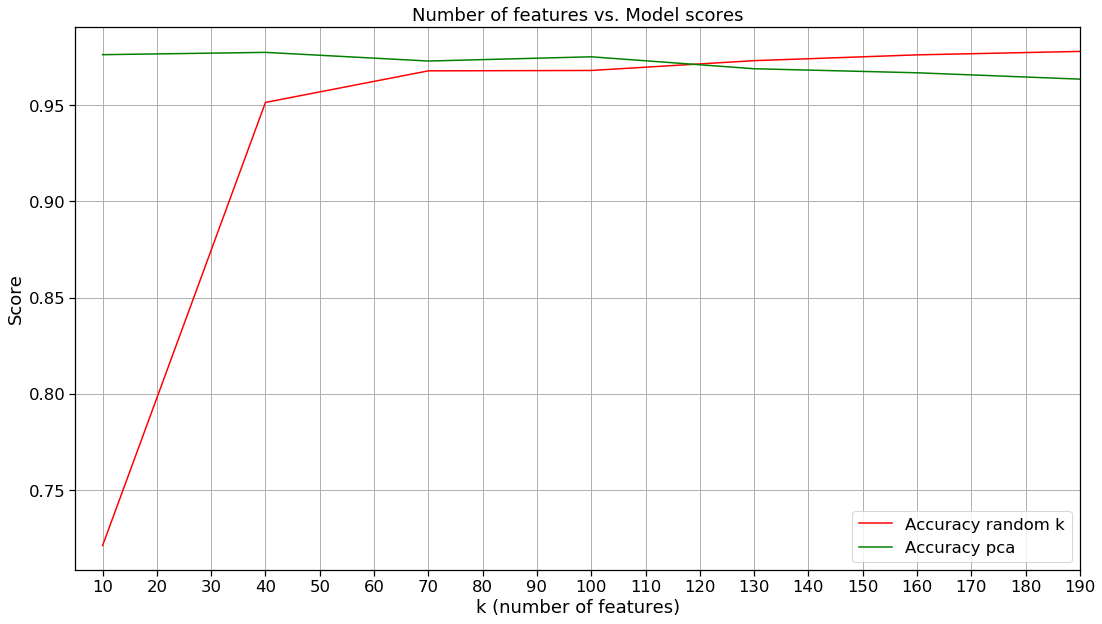

In [16]:
plt.figure(figsize = (18,10))
plt.plot(range(10, 201, best_k), acc_list_r,color='r', label = 'Accuracy random k',)
plt.plot(range(10, 201, best_k), acc_list, color='g', label = 'Accuracy pca')

plt.xlabel('k (number of features)')
plt.ylabel('Score')
plt.legend()
plt.xlim(5,100)
plt.grid()
plt.xticks(np.arange(10, 200, 10))
plt.title('Number of features vs. Model scores');

best_k_rand=(np.argmax(acc_list_r))*best_k+10
print(f'The best number of components for PCA is {np.argmax(acc_list)*best_k+10} with step {best_k}')
print(f'The best number for random  components sampling is {best_k_rand}  with step {best_k}')

In [10]:
print(f'Accuracy for {np.argmax(acc_list)*best_k+10} components is {np.max(acc_list)}')
print(f'Accuracy for {best_k_rand} components is {np.max(acc_list_r)}')

Accuracy for 40 components is 0.9774
Accuracy for 190 components is 0.9779


From the plot we can see, that the model with PCA gives us better rusult with the small number of components and the model with random sampling features doesn't the same at the same point(it works better with big number of components than with small). But we see also that in point about 120 the accuracy of model with PCA decreases and accuracy of model with random sampling features increases